# Step 4 – Develop Model - Task 1. Prediction Setup


### Load Libraries


In [1]:
import os
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Set up environment and connect to Google Drive

In [2]:
using_Google_colab = False
using_Anaconda_on_Mac_or_Linux = True
using_Anaconda_on_windows = False

if using_Google_colab:
    dir_input = "/content/drive/MyDrive/COVID_Project/input"
    dir_output = "/content/drive/MyDrive/COVID_Project/output"
if using_Anaconda_on_Mac_or_Linux:
    dir_input = "../input"
    dir_output = "../output"    
if using_Anaconda_on_windows:
    dir_input = r"..\input"  
    dir_output = r"..\output"  

In [3]:
if using_Google_colab:
    from google.colab import drive
    drive.mount('/content/drive')

## DM1.1 Open Notebook titled “Step-4-Develop-Model-Task-1-Prediction-setup” and upload the state data, organizing by date while replacing empty cells with zeros - Activities 1 and 2


### Upload State level Data


In [4]:
df_abt_by_state = pd.read_csv(os.path.join(dir_output, 'abt_by_state.csv'),
                              index_col=['Date'], 
                              parse_dates=['Date'])
df_abt_by_state

,State,StateFIPS,Total Cases,Incremental Cases,cases moving_avg,Total Deaths,Incremental Deaths,death moving_avg
Date,,,,,,,,
2020-01-22,AL,1,0,NaN,NaN,0,NaN,NaN
2020-01-23,AL,1,0,0.0,NaN,0,0.0,NaN
2020-01-24,AL,1,0,0.0,NaN,0,0.0,NaN
2020-01-25,AL,1,0,0.0,NaN,0,0.0,NaN
2020-01-26,AL,1,0,0.0,NaN,0,0.0,NaN
...,...,...,...,...,...,...,...,...
2022-01-23,CT,9,671674,0.0,4871.714286,9769,0.0,30.428571
2022-01-24,CT,9,683731,12057.0,4330.714286,9774,5.0,31.428571
2022-01-25,CT,9,687555,3824.0,4267.857143,9773,-1.0,29.857143


### Filter Data to a specific state (e.g., CA)

In [5]:
df_abt_chosen_state = df_abt_by_state[df_abt_by_state['State'] == 'CA']
df_abt_chosen_state = df_abt_chosen_state.dropna()
df_abt_chosen_state

,State,StateFIPS,Total Cases,Incremental Cases,cases moving_avg,Total Deaths,Incremental Deaths,death moving_avg
Date,,,,,,,,
2020-02-03,CA,6,34,7.0,-104.571429,0,0.0,0.000000
2020-02-04,CA,6,38,4.0,-104.857143,0,0.0,0.000000
2020-02-05,CA,6,39,1.0,-105.285714,0,0.0,0.000000
2020-02-06,CA,6,43,4.0,-105.714286,0,0.0,0.000000
2020-02-07,CA,6,49,6.0,-107.000000,1,1.0,0.142857
...,...,...,...,...,...,...,...,...
2022-01-23,CA,6,7554303,85178.0,86585.428570,78010,175.0,118.714286
2022-01-24,CA,6,7626265,71962.0,83612.428570,78502,492.0,161.142857
2022-01-25,CA,6,7680316,54051.0,84924.714290,78533,31.0,160.857143


In [9]:
state_covid_cases = df_abt_chosen_state['Incremental Cases']
state_covid_deaths = df_abt_chosen_state['Incremental Deaths']
state_moving_avg_cases = df_abt_chosen_state['cases moving_avg']
state_covid_cases_ewm_7 = state_covid_cases.ewm(span=7, adjust= False).mean()

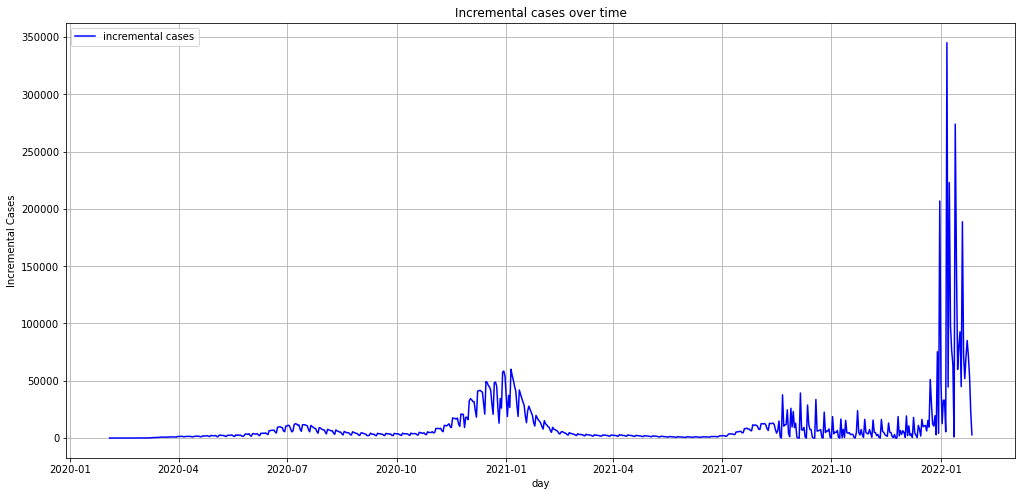

In [7]:
plt.figure(figsize=(17,8))
plt.title('Incremental cases over time')
plt.ylabel('Incremental Cases')
plt.xlabel('day')
plt.plot(state_covid_cases, 'b', label='incremental cases')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

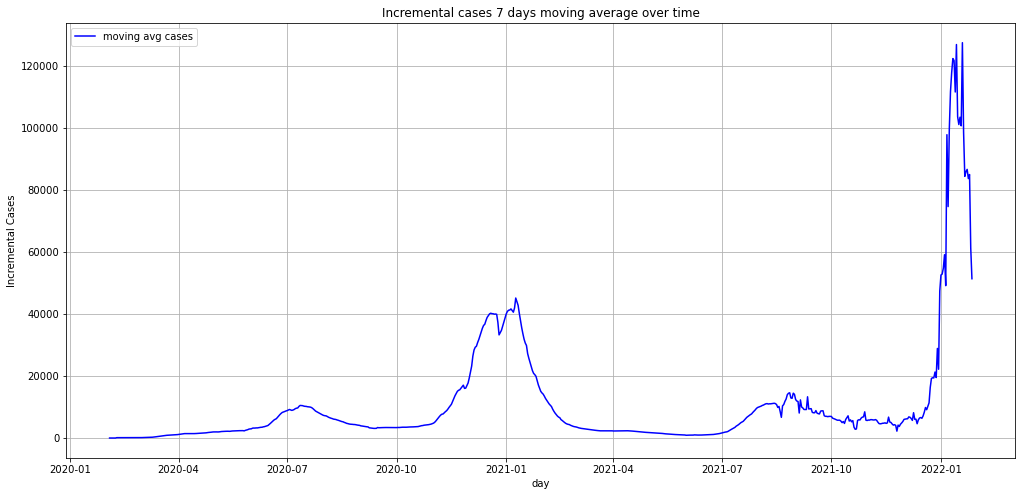

In [8]:
plt.figure(figsize=(17,8))
plt.title('Incremental cases 7 days simple moving average over time')
plt.ylabel('Incremental Cases')
plt.xlabel('day')
plt.plot(state_moving_avg_cases, 'b', label='moving avg cases')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

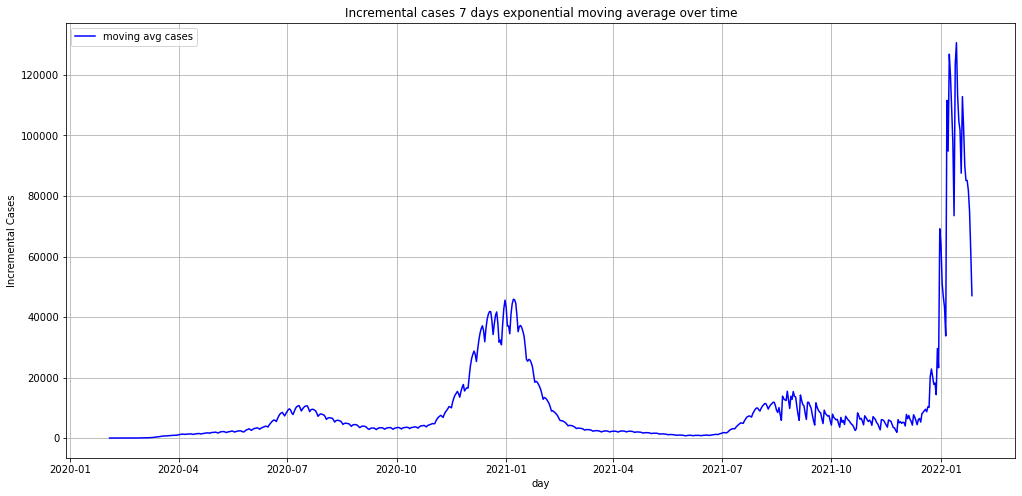

In [10]:
plt.figure(figsize=(17,8))
plt.title('Incremental cases 7 days exponential moving average over time')
plt.ylabel('Incremental Cases')
plt.xlabel('day')
plt.plot(state_covid_cases_ewm_7, 'b', label='moving avg cases')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

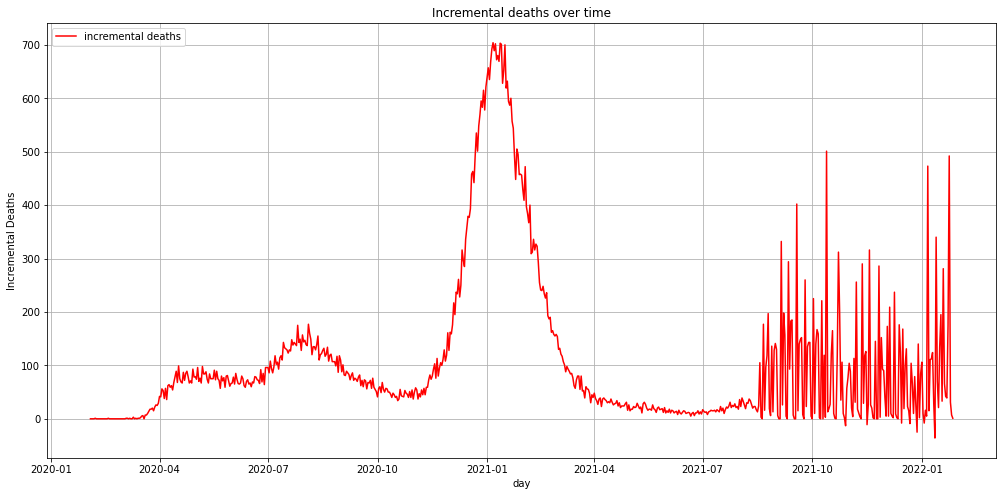

In [10]:
plt.figure(figsize=(17,8))
plt.title('Incremental deaths over time')
plt.ylabel('Incremental Deaths')
plt.xlabel('day')
plt.plot(state_covid_deaths, 'r', label='incremental deaths')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### DM 1.2 -  Activity 3: Select incremental cases and incremental deaths columns respectively as series, find their max and normalize.

In [11]:
state_covid_cases = df_abt_chosen_state['Incremental Cases']
cases_max = state_covid_cases.max()
state_covid_cases = state_covid_cases/cases_max
state_covid_deaths = df_abt_chosen_state['Incremental Deaths']
deaths_max = state_covid_deaths.max()
state_covid_deaths = state_covid_deaths / deaths_max

In [12]:
cases_max

345159.0

### DM1.3 - Visualize the data and make observations  
### Activity 4 - Plot Incremental Cases and Incremental Deaths

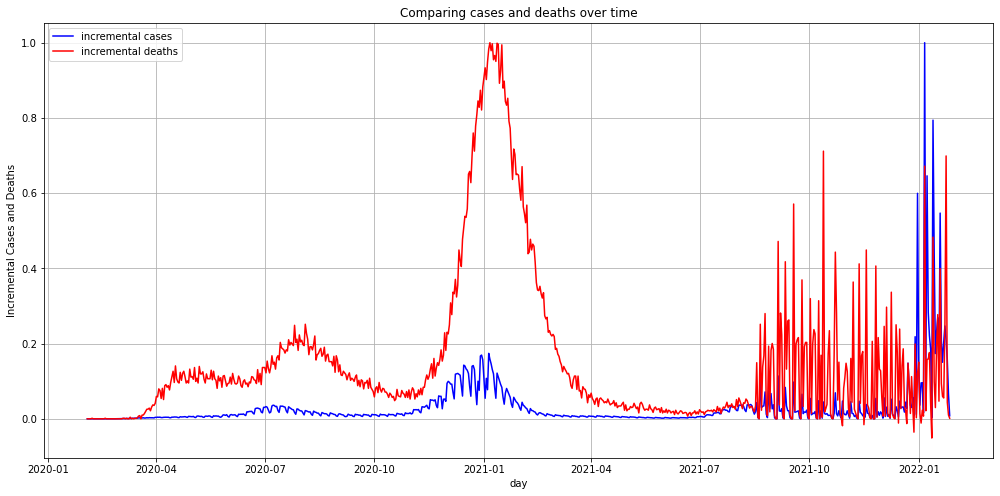

In [13]:
plt.figure(figsize=(17,8))
plt.title('Comparing cases and deaths over time')
plt.ylabel('Incremental Cases and Deaths')
plt.xlabel('day')
plt.plot(state_covid_cases, 'b', label='incremental cases')
plt.plot(state_covid_deaths, 'r', label='incremental deaths')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### DM1.4  - Activity 5 - Compute 7 days and 30 days moving averages and visualize cross over points 

In [14]:
state_covid_cases_ewm_7 = state_covid_cases.ewm(span=7, adjust= False).mean()
cases_ewm_7_max = state_covid_cases_ewm_7.max()
state_covid_cases_ewm_7 = state_covid_cases_ewm_7/cases_ewm_7_max
state_covid_deaths_ewm_7 = state_covid_deaths.ewm(span=7, adjust=False).mean()
deaths_ewm_7_max = state_covid_deaths_ewm_7.max()
state_covid_deaths_ewm_7 = state_covid_deaths_ewm_7/deaths_ewm_7_max
state_covid_cases_ewm_30 = state_covid_cases.ewm(span=30, adjust= False).mean()
cases_ewm_30_max = state_covid_cases_ewm_30.max()
state_covid_cases_ewm_30 = state_covid_cases_ewm_30/cases_ewm_30_max
state_covid_deaths_ewm_30 = state_covid_deaths.ewm(span=30, adjust=False).mean()
deaths_ewm_30_max = state_covid_deaths_ewm_30.max()
state_covid_deaths_ewm_30 = state_covid_deaths_ewm_30/deaths_ewm_30_max

### DM1.4 - Activity 5 - Plot 30 days average

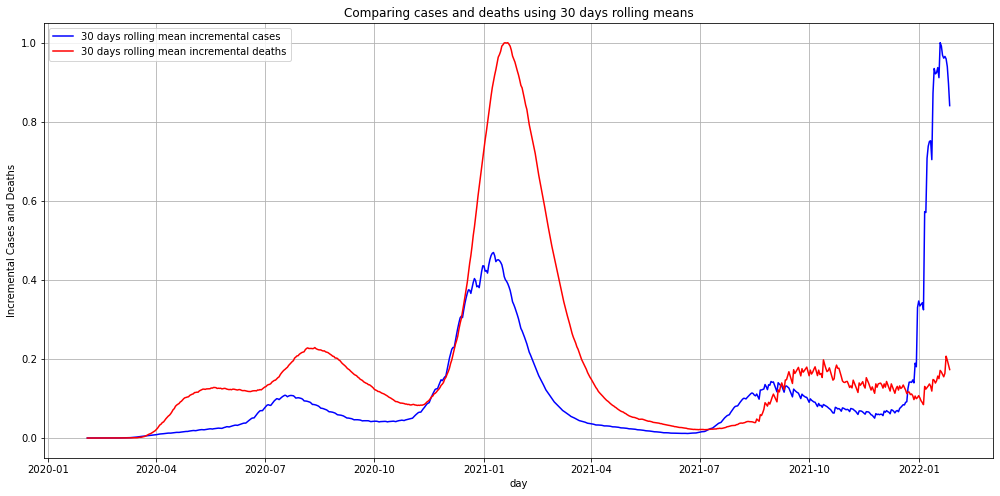

In [16]:
plt.figure(figsize=(17,8))
plt.title('Comparing cases and deaths using 30 days rolling means')
plt.ylabel('Incremental Cases and Deaths')
plt.xlabel('day')
plt.plot(state_covid_cases_ewm_30, 'b', label='30 days rolling mean incremental cases')
plt.plot(state_covid_deaths_ewm_30, 'r', label='30 days rolling mean incremental deaths')
plt.legend(loc='best')
plt.grid(True)
plt.show()

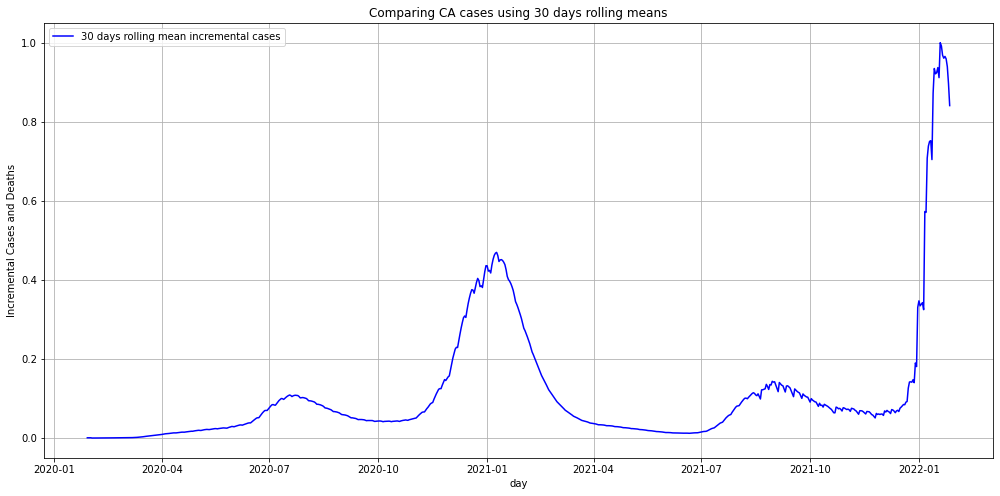

In [34]:
plt.figure(figsize=(17,8))
plt.title('Comparing CA cases using 30 days rolling means')
plt.ylabel('Incremental Cases and Deaths')
plt.xlabel('day')
plt.plot(state_covid_cases_ewm_30, 'b', label='30 days rolling mean incremental cases')
plt.legend(loc='best')
plt.grid(True)
plt.show()

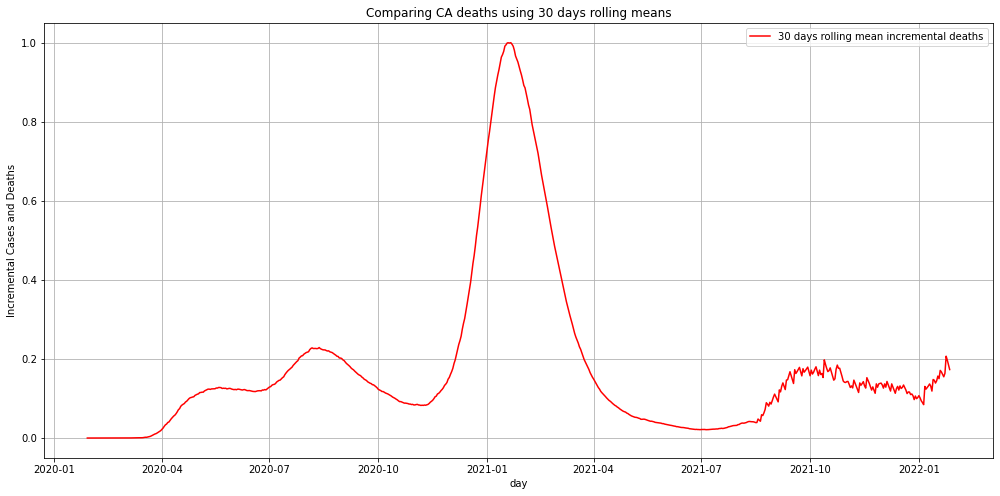

In [35]:
plt.figure(figsize=(17,8))
plt.title('Comparing CA deaths using 30 days rolling means')
plt.ylabel('Incremental Cases and Deaths')
plt.xlabel('day')
plt.plot(state_covid_deaths_ewm_30, 'r', label='30 days rolling mean incremental deaths')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### DM1.4 - Activity 6 - Compare 7 days and 30 days averages to identify cross over points

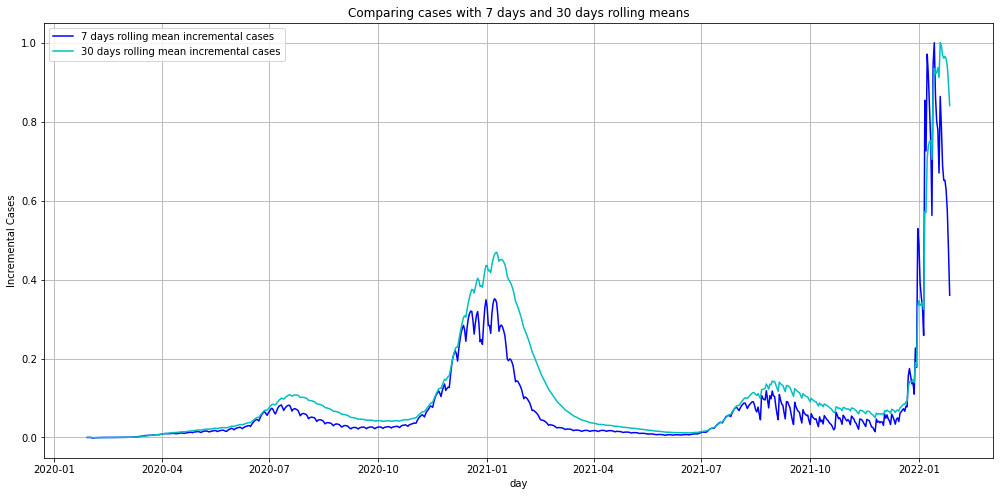

In [40]:
plt.figure(figsize=(17,8))
plt.title('Comparing cases with 7 days and 30 days rolling means')
plt.ylabel('Incremental Cases')
plt.xlabel('day')
#plt.plot(normalized_state_covid_cases, 'b', label='incremental cases')
plt.plot(state_covid_cases_ewm_7, 'b', label='7 days rolling mean incremental cases')
plt.plot(state_covid_cases_ewm_30, 'c', label='30 days rolling mean incremental cases')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Activity 6: Compute delta between 7 days and 30 days - Compute MACD 

In [37]:
delta_cases = state_covid_cases_ewm_7 - state_covid_cases_ewm_30

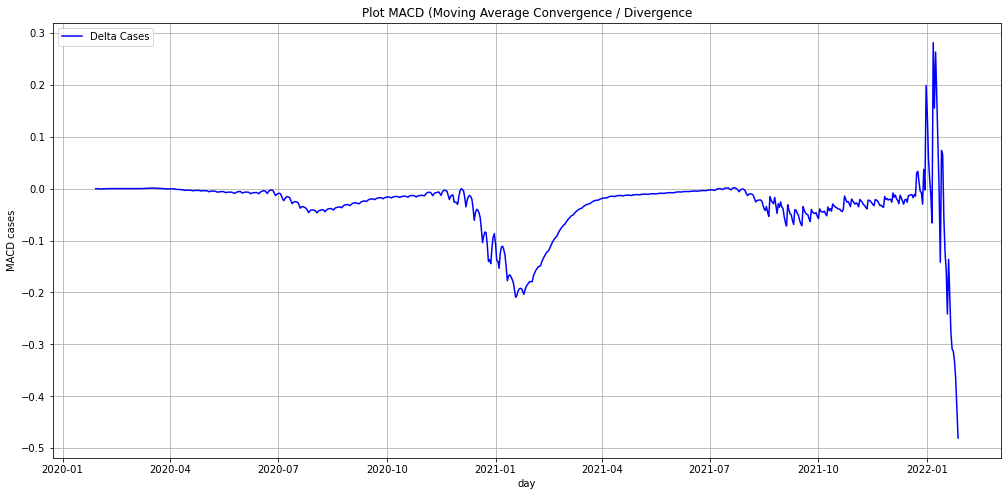

In [39]:
plt.figure(figsize=(17,8))
plt.title('Plot MACD (Moving Average Convergence / Divergence')
plt.ylabel('MACD cases')
plt.xlabel('day')
plt.plot(delta_cases, 'b', label='Delta Cases')
plt.legend(loc='best')
plt.grid(True)
plt.show()